<a href="https://colab.research.google.com/github/femketenharkel/Predicting_Ratings/blob/main/Error_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Error analysis

# RF + K-MEANS

In [5]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
import joblib
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
drive.mount('/content/drive')
df_final = pd.read_csv('/content/drive/My Drive/Thesis/Data/df_final_K-Means_clustering4.csv')
model = joblib.load("/content/drive/My Drive/Thesis/Models/K-Means_RF.pkl")

Mounted at /content/drive


In [9]:
# Define feature and target
X = df_final.drop(columns=['Rating'])
y = df_final['Rating']

# Split data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)

In [10]:
# Predict on the test set
test_predictions = model.predict(X_test)

In [15]:
class_names = sorted(y_train.unique())

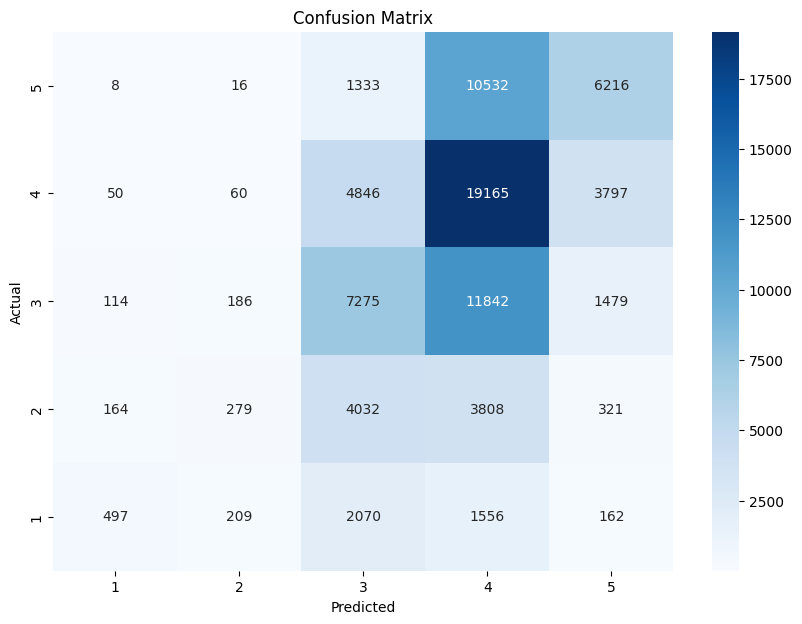

In [17]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.gca().invert_yaxis()  # Invert the y-axis
plt.show()

# XGB WITH K_MEANS

In [19]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
import joblib
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
drive.mount('/content/drive')
df_final = pd.read_csv('/content/drive/My Drive/Thesis/Data/df_final_K-Means_clustering4.csv')
model = joblib.load("/content/drive/My Drive/Thesis/Models/K-Means_XGB.pkl")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:27:44] WARNING: /workspace/src/gbm/gbtree.cc:388: Changing updater from `grow_gpu_hist` to `grow_quantile_histmaker`.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:27:44] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:27:44] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


In [28]:
# Define feature and target
X = df_final.drop(columns=['Rating'])
y = df_final['Rating']

from sklearn.preprocessing import LabelEncoder
# Assuming you have a label encoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
class_names = label_encoder.classes_

# Split data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)

In [29]:
# Predict on the test set
test_predictions = model.predict(X_test)

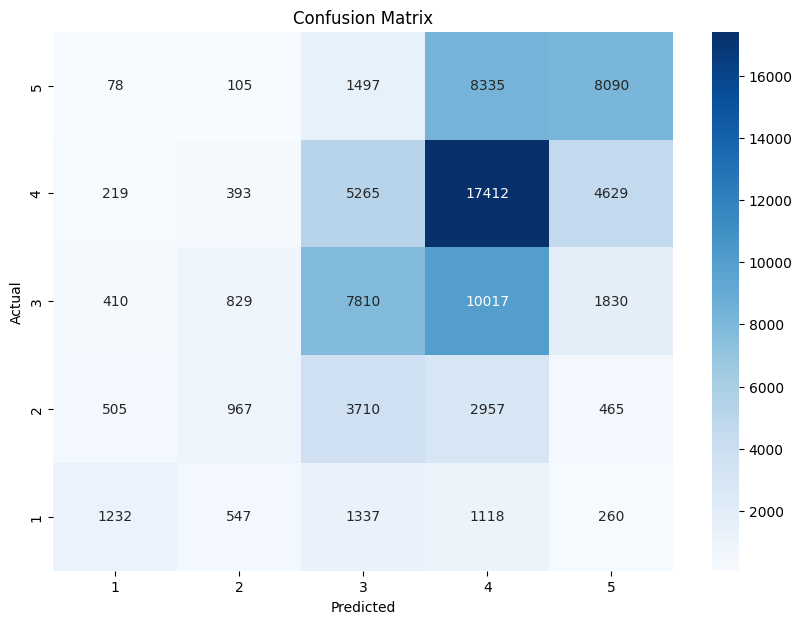

In [32]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.gca().invert_yaxis()  # Invert the y-axis
plt.show()